In [1]:
import numpy as np
import pandas as pd
import os
from toolbox.utils import import_saws_data
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '../database/johannesburg/weather/'
files = os.listdir(path)

temp = pd.DataFrame()
hum = pd.DataFrame()
pres = pd.DataFrame()
windspeed = pd.DataFrame()
rain = pd.DataFrame()
winddir = pd.DataFrame()

for file in files:
    if file.endswith('_temp.csv'):
        temp = pd.concat([temp, import_saws_data(path + file)])
    elif file.endswith('_humidity.csv'):
        hum = pd.concat([hum, import_saws_data(path + file)])
    elif file.endswith('_pressure.csv'):
        pres = pd.concat([pres, import_saws_data(path + file)])
    elif file.endswith('_windspeed.csv'):
        windspeed = pd.concat([windspeed, import_saws_data(path + file)])
    elif file.endswith('_rain.csv'):
        rain = pd.concat([rain, import_saws_data(path + file)])
    elif file.endswith('_winddir.csv'):
        winddir = pd.concat([winddir, import_saws_data(path + file)])
    elif file.endswith('.csv'):
        print('{} is not a valid file'.format(file))

# Concatenate all dataframes
df = pd.concat([temp, hum, pres, rain, winddir, windspeed], axis=1)
df.columns = ['Outdoor Dry Bulb Temperature', 'Outdoor Relative Humidity', 'Atmospheric Station Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed']

all_weather.csv is not a valid file


In [3]:
#%% Clean Data

df = df.loc['2014-01-15 00:00:00':'2014-07-24 23:00:00']

df['Precipitable Water'] = df['Precipitable Water'].fillna(0)
df['Precipitable Water'] = df['Precipitable Water'].replace('      ', 0)
df['Precipitable Water'] = df['Precipitable Water'].astype(float)

df['Wind Speed'] = df['Wind Speed'].fillna(0)

df['Atmospheric Station Pressure'] = df['Atmospheric Station Pressure'].fillna(method='ffill')

df['Wind Speed'] = df['Wind Speed'].replace('     -', np.nan)
df['Wind Speed'] = df['Wind Speed'].fillna(method='ffill')
df['Wind Speed'] = df['Wind Speed'].astype(float)

df['Wind Direction'] = df['Wind Direction'].replace(np.nan, 0)
df['Wind Direction'] = df['Wind Direction'].replace('     -', 0)
df['Wind Direction'] = df['Wind Direction'].astype(int)

df['Datetime'] = df.index
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [4]:
#%% Check data for missing values and types
print('The dataframe contain missing values:\n{}'.format(df.isnull().sum()))
print('The type of the data is:\n{}'.format(df.dtypes))

The dataframe contain missing values:
Outdoor Dry Bulb Temperature    0
Outdoor Relative Humidity       0
Atmospheric Station Pressure    0
Precipitable Water              0
Wind Direction                  0
Wind Speed                      0
Datetime                        0
dtype: int64
The type of the data is:
Outdoor Dry Bulb Temperature           float64
Outdoor Relative Humidity              float64
Atmospheric Station Pressure           float64
Precipitable Water                     float64
Wind Direction                           int32
Wind Speed                             float64
Datetime                        datetime64[ns]
dtype: object


In [5]:
#%% Export data
df.to_csv('../database/cleaned/johannesburg_weather.csv')

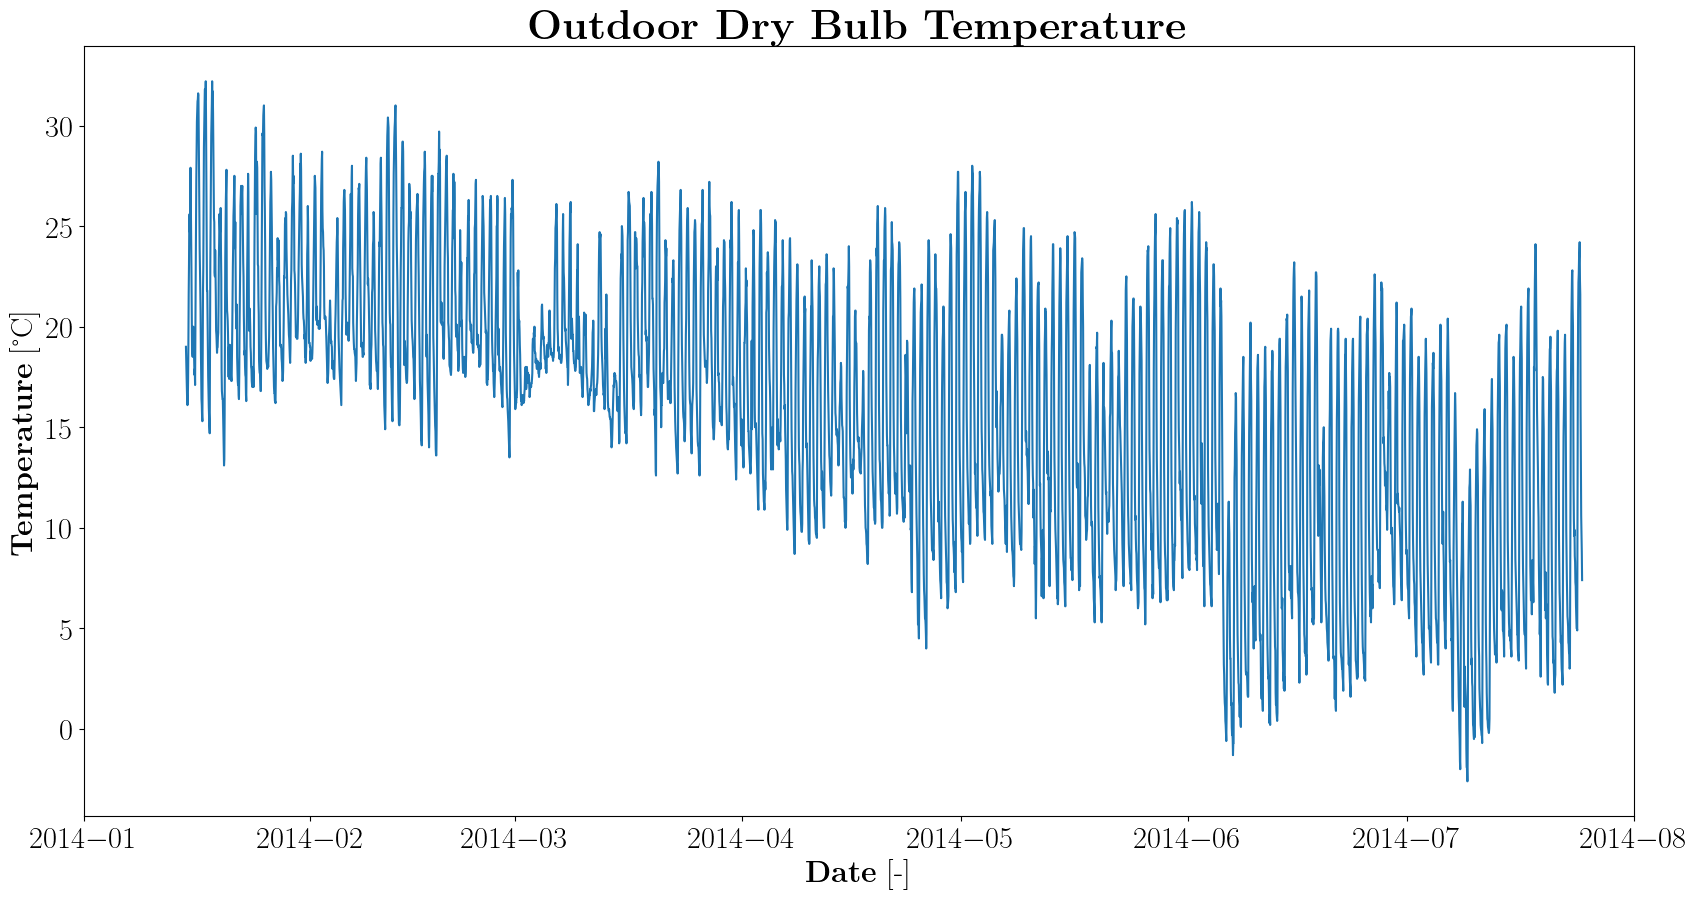

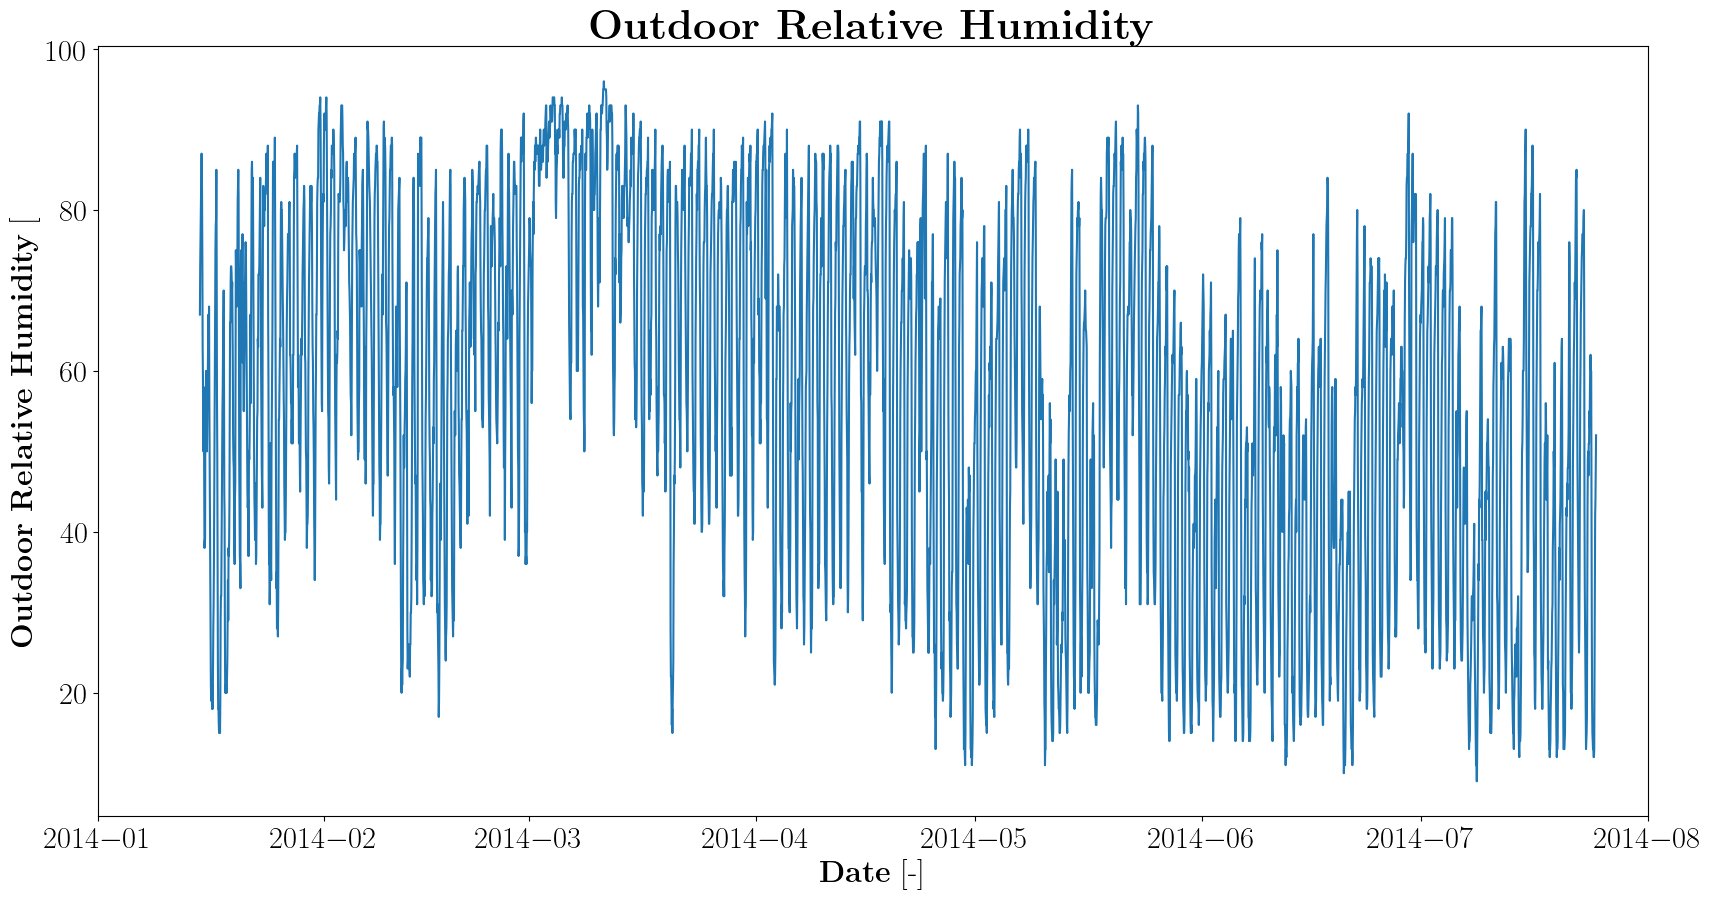

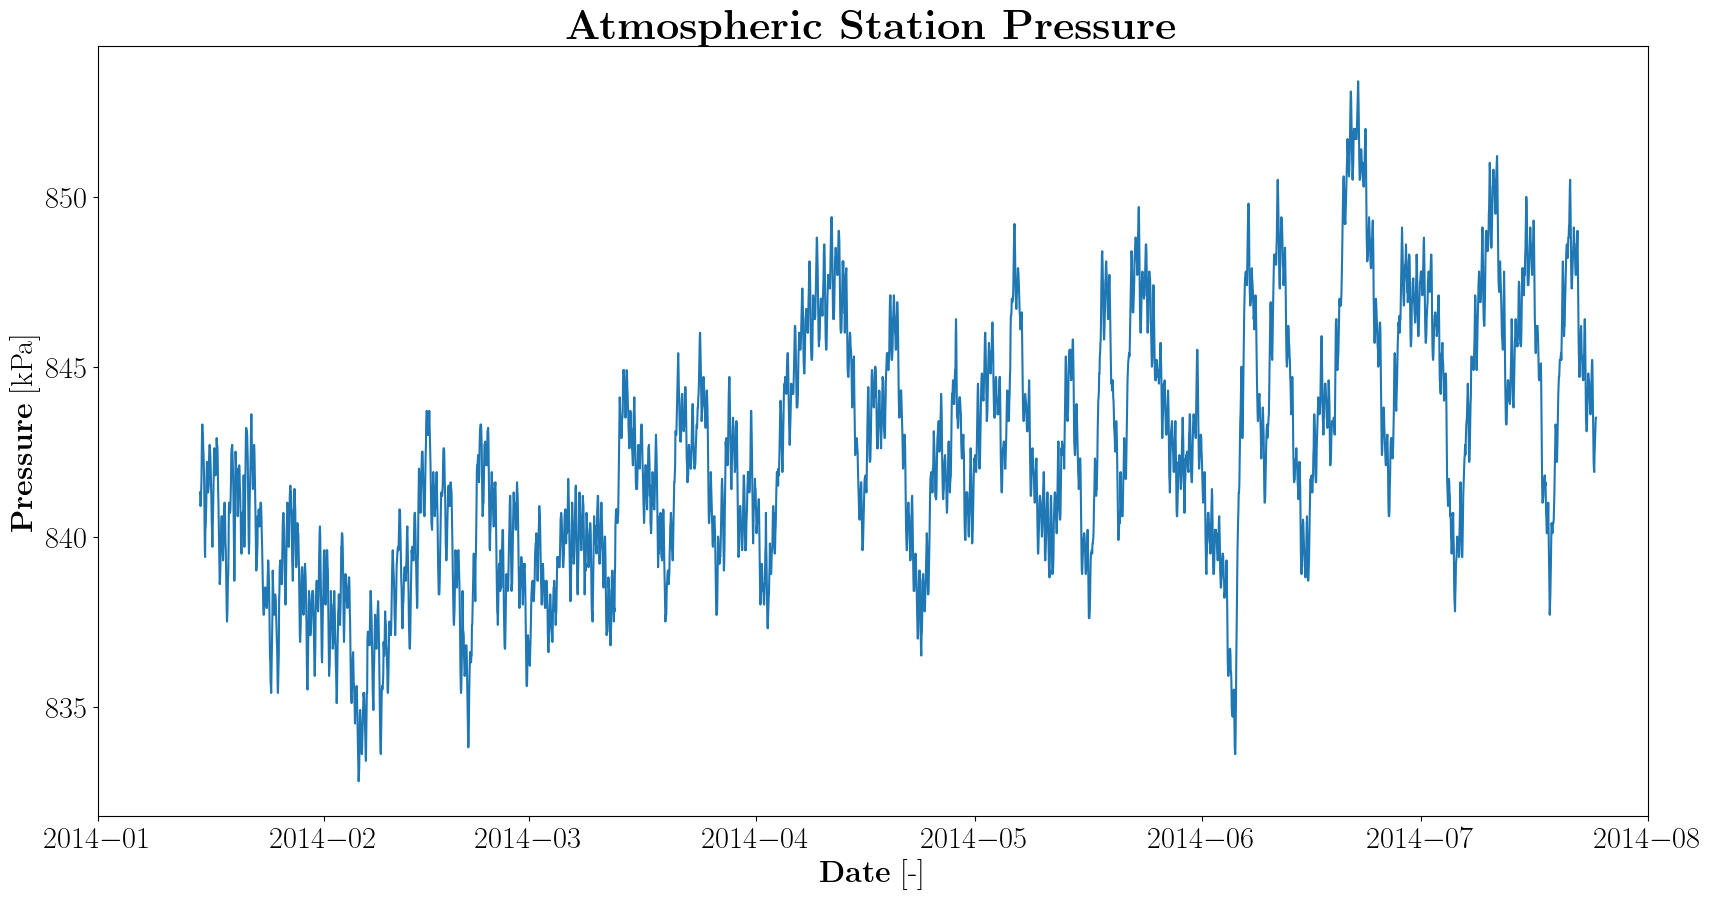

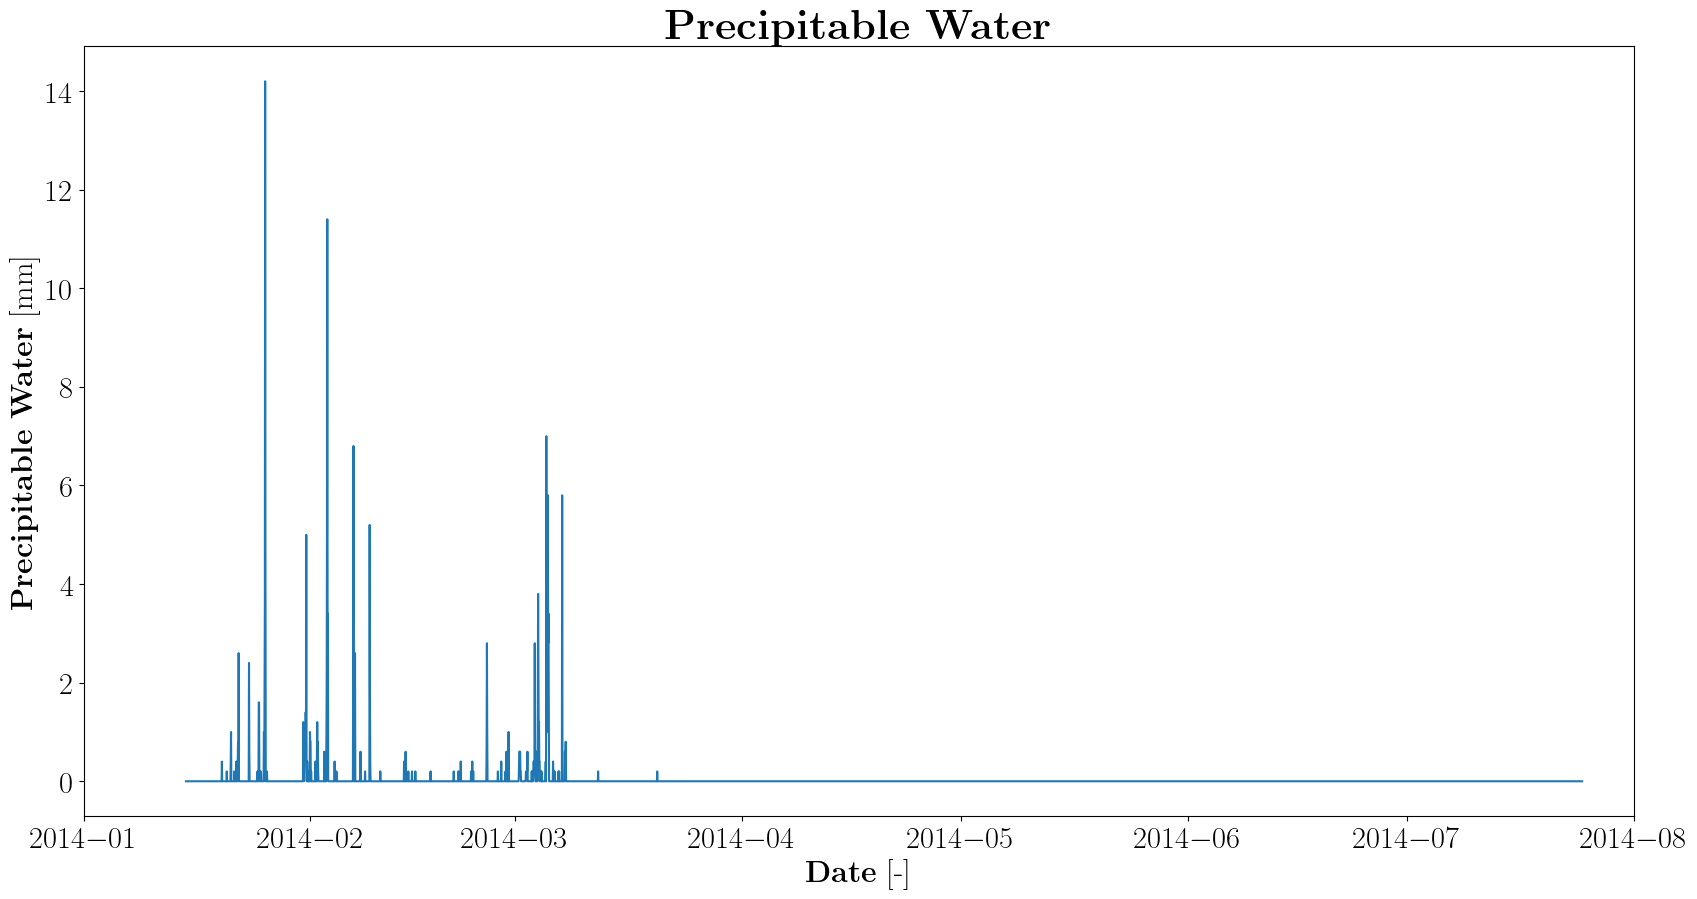

In [6]:
#%% Figures
import matplotlib.pyplot as plt
import seaborn as sns
from toolbox.figures import figure_params, figure_save

# Plot the dry bulb temperature
plt =  figure_params(
    title='Outdoor Dry Bulb Temperature',
    xlabel='Date',
    ylabel='Temperature',
    x_units= '-',
    y_units= '°C',
)
plt.plot(df.index, df['Outdoor Dry Bulb Temperature'], label='Outdoor Dry Bulb Temperature')
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2014-08-01'))
plt.show()

# Plot the relative humidity
plt =  figure_params(
    title='Outdoor Relative Humidity',
    xlabel='Date',
    ylabel='Outdoor Relative Humidity',
    x_units= '-',
    y_units= '%',
)
plt.plot(df.index, df['Outdoor Relative Humidity'], label='Outdoor Relative Humidity')
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2014-08-01'))
plt.show()

# Plot the atmospheric station pressure
plt =  figure_params(
    title='Atmospheric Station Pressure',
    xlabel='Date',
    ylabel='Pressure',
    x_units= '-',
    y_units= 'kPa',
)
plt.plot(df.index, df['Atmospheric Station Pressure'], label='Atmospheric Station Pressure')
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2014-08-01'))
plt.show()

# Plot the precipitable water
plt =  figure_params(
    title='Precipitable Water',
    xlabel='Date',
    ylabel='Precipitable Water',
    x_units= '-',
    y_units= 'mm',
)
plt.plot(df.index, df['Precipitable Water'], label='Precipitable Water')
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2014-08-01'))
plt.show()

import plotly.express as px

# fig = px.bar_polar(df[['Wind Direction', 'Wind Speed']], r="Wind Speed", theta="Wind Direction",
#                     template=,
#                    color_discrete_sequence= px.colors.sequential.Plasma_r)

# fig.show()